In [3]:
import cv2 as cv
img = cv.imread('D:/1azanshi/1/b/24wei.bmp',1)
img_1 = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv.imshow('gray',img_1)
cv.imshow('colour',img)
cv.waitKey(0)


1

<ipython-input-1-35d4d1a5b9e5>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,4)


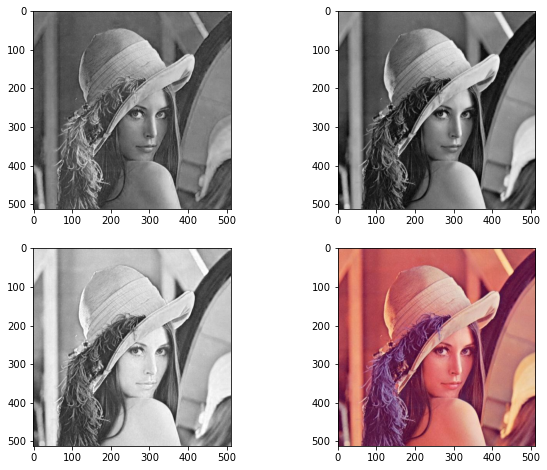

In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('D:/1azanshi/1/b/24wei.bmp',1)
#cv2.imread读取图片格式是BGR
b,g,r = cv.split(img)  #这个地方将图像拆分，把彩色图像分为3个颜色
plt.figure(figsize=(10,8))
color = [b,g,r]
img_2 = cv.merge([r,g,b])  #这个地方我把bgr格式的图片转成了rgb,然后显示的时候会变成正常的彩色
for i in range(3):
    plt.subplot(2,2,i+1)
    plt.imshow(color[i],'gray')
    plt.subplot(2,2,4)
    plt.imshow(img_2)
plt.savefig('./三通道灰度.png')
plt.show()



In [2]:
from PIL import Image
I = Image.open('D:/1azanshi/1/b/24wei.bmp')
L = I.convert('L')
L.show()

In [3]:
# open-cv library is installed as cv2 in python
# import cv2 library into this program
import cv2 as cv
 
# read an image using imread() function of cv2
# we have to  pass only the path of the image
img = cv.imread('D:/1azanshi/1/b/24wei.bmp',1)
 
# displaying the image using imshow() function of cv2
# In this : 1st argument is name of the frame
# 2nd argument is the image matrix

cv.imshow('original image',img)
 
# converting the colourfull image into HSV format image
# using cv2.COLOR_BGR2HSV argument of
# the cvtColor() function of cv2
# in this :
# ist argument is the image matrix
# 2nd argument is the attribute
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

 
# displaying the Hsv format image
cv.imshow('HSV format image',hsv)

cv.waitKey(0)


-1

In [4]:
import cv2
import numpy as np

def rgbtohsi(rgb_lwpImg):
  rows = int(rgb_lwpImg.shape[0])
  cols = int(rgb_lwpImg.shape[1])
  b, g, r = cv2.split(rgb_lwpImg)
  # 归一化到[0,1]
  b = b / 255.0
  g = g / 255.0
  r = r / 255.0
  hsi_lwpImg = rgb_lwpImg.copy()
  H, S, I = cv2.split(hsi_lwpImg)
  for i in range(rows):
    for j in range(cols):
      num = 0.5 * ((r[i, j]-g[i, j])+(r[i, j]-b[i, j]))
      den = np.sqrt((r[i, j]-g[i, j])**2+(r[i, j]-b[i, j])*(g[i, j]-b[i, j]))
      theta = float(np.arccos(num/den))

      if den == 0:
          H = 0
      elif b[i, j] <= g[i, j]:
        H = theta
      else:
        H = 2*3.14169265 - theta

      min_RGB = min(min(b[i, j], g[i, j]), r[i, j])
      sum = b[i, j]+g[i, j]+r[i, j]
      if sum == 0:
        S = 0
      else:
        S = 1 - 3*min_RGB/sum

      H = H/(2*3.14159265)
      I = sum/3.0
      # 输出HSI图像，扩充到255以方便显示，一般H分量在[0,2pi]之间，S和I在[0,1]之间
      hsi_lwpImg[i, j, 0] = H*255
      hsi_lwpImg[i, j, 1] = S*255
      hsi_lwpImg[i, j, 2] = I*255
  return hsi_lwpImg
if __name__ == '__main__':
  rgb_lwpImg = cv2.imread("D:/1azanshi/1/b/24wei.bmp")
  hsi_lwpImg = rgbtohsi(rgb_lwpImg)
  cv2.imshow('lena.jpg', rgb_lwpImg)
  cv2.imshow('hsi_lwpImg', hsi_lwpImg)
  key = cv2.waitKey(0) & 0xFF
  if key == ord('q'):
    cv2.destroyAllWindows()



In [ ]:
import cv2
import numpy as np
import os


def stackImages(scale, imgArray):
    """
        将多张图像压入同一个窗口显示
        :param scale:float类型，输出图像显示百分比，控制缩放比例，0.5=图像分辨率缩小一半
        :param imgArray:元组嵌套列表，需要排列的图像矩阵
        :return:输出图像
    """
    rows = len(imgArray)
    cols = len(imgArray[0])

    rowsAvailable = isinstance(imgArray[0], list)

    # 用空图片补齐
    for i in range(rows):
        tmp = cols - len(imgArray[i])
        for j in range(tmp):
            img = np.zeros((imgArray[0][0].shape[0], imgArray[0][0].shape[1]), dtype='uint8')
            imgArray[i].append(img)

    # 判断维数
    if rows>=2:
        width = imgArray[0][0].shape[1]
        height = imgArray[0][0].shape[0]

    else:
        width = imgArray[0].shape[1]
        height = imgArray[0].shape[0]

    if rowsAvailable:
        for x in range(0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape[:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]),
                                                None, scale, scale)
                if len(imgArray[x][y].shape) == 2:
                    imgArray[x][y] = cv2.cvtColor(imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank] * rows
        hor_con = [imageBlank] * rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None, scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor = np.hstack(imgArray)
        ver = hor
    return ver
# 分割结果输出路径
output_dir = "D:/1azanshi/1/b/output"
# 车牌路径
file_path="D:/1azanshi/1/b/c/"
# 读取所有车牌
cars = os.listdir(file_path)
cars.sort()

# 循环操作每一张车牌
for car in cars:
    # 读取图片
    print("正在处理"+file_path+car)
    src = cv2.imread(file_path+car)
    img = src.copy()

    # 预处理去除螺丝点
    cv2.circle(img, (145, 20), 10, (255, 0, 0), thickness=-1)
    cv2.circle(img, (430, 20), 10, (255, 0, 0), thickness=-1)
    cv2.circle(img, (145, 170), 10, (255, 0, 0), thickness=-1)
    cv2.circle(img, (430, 170), 10, (255, 0, 0), thickness=-1)
    cv2.circle(img, (180, 90), 10, (255, 0, 0), thickness=-1)

    # 转灰度
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 二值化
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 333, 1)

    # 闭运算
    kernel = np.ones((5, 5), int)
    morphologyEx = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_CLOSE, kernel)

    # 找边界
    contours, hierarchy = cv2.findContours(morphologyEx, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # 画边界
    img_1 = img.copy()
    cv2.drawContours(img_1, contours, -1, (0, 0, 0), -1)

    imgStack = stackImages(0.7, ([src, img, gray], [adaptive_thresh, morphologyEx, img_1]))
    cv2.imshow("imgStack", imgStack)
    cv2.waitKey(0)

    # 转灰度为了方便切割
    gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

    # 每一列的白色数量
    white = []
    # 每一列的黑色数量
    black = []
    # 区域高度取决于图片高
    height = gray_1.shape[0]
    # 区域宽度取决于图片宽
    width = gray_1.shape[1]
    # 最大白色数量
    white_max = 0
    # 最大黑色数量
    black_max = 0
    # 计算每一列的黑白色像素总和
    for i in range(width):
        s = 0  # 这一列白色总数
        t = 0  # 这一列黑色总数
        for j in range(height):
            if gray_1[j][i] == 255:
                s += 1
            if gray_1[j][i] == 0:
                t += 1
        white_max = max(white_max, s)
        black_max = max(black_max, t)
        white.append(s)
        black.append(t)


    # 找到右边界
    def find_end(start):
        end = start + 1
        for m in range(start + 1, width - 1):
            # 基本全黑的列视为边界
            if black[m] >= black_max * 0.95:  # 0.95这个参数请多调整，对应下面的0.05
                end = m
                break
        return end


    # 临时变量
    n = 1

    # 起始位置
    start = 1

    # 结束位置
    end = 2

    # 分割结果数量
    num=0

    # 分割结果
    res = []

    # 保存分割结果路径,以图片名命名
    output_path= output_dir + car.split('.')[0]
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    # 从左边网右边遍历
    while n < width - 2:
        n += 1

        # 找到白色即为确定起始地址
        # 不可以直接 white[n] > white_max
        if white[n] > 0.05 * white_max:
            start = n
            # 找到结束坐标
            end = find_end(start)
            # 下一个的起始地址
            n = end

            # 确保找到的是符合要求的,过小不是车牌号
            if end - start > 10:
                # 分割
                char = gray_1[1:height, start - 5:end + 5]
                # 保存分割结果到文件
                cv2.imwrite(output_path+'/' + str(num) + '.jpg',char)
                num+=1
                # 重新绘制大小
                char = cv2.resize(char, (300, 300), interpolation=cv2.INTER_CUBIC)
                # 添加到结果集合
                res.append(char)

                # cv2.imshow("imgStack", char)
                # cv2.waitKey(0)

    # 构造结果元祖方便结果展示
    res2 = (res[:2], res[2:4], res[4:6], res[6:])
    # 显示结果
    imgStack = stackImages(0.5, res2)
    cv2.imshow("imgStack", imgStack)
    cv2.waitKey(0)
cv2.destroyAllWindows()



正在处理D:/1azanshi/1/b/c/C5Q712.BMP
正在处理D:/1azanshi/1/b/c/E68QR3.BMP
正在处理D:/1azanshi/1/b/c/TY9109.BMP
